## Ime: Aleksa Čavić

## Broj indeksa: 2021201721
## Smer: Računarske nauke

### Statistički podaci o COVID-19
Ideja projekta je da uz pomoć prikupljenih podataka dođe do različitih informacija u vezi sa samim korona virusom koji bi donekle mogli da pomognu u borbi protiv istog.<br>Svi podaci koji su korišćeni u projektu su iz realnog sveta preuzeti sa narednih sajtova:<br><ul><li>https://github.com/owid/covid-19-data/tree/master/public/data</li><li>https://data.oecd.org/gga/trust-in-government.htm</li><li>https://datasetsearch.research.google.com</li><li>https://worldpopulationreview.com/country-rankings/average-iq-by-country</li></ul>

### Učitavanje i importovanje:

<ul><li>Importovanje potrebnih biblioteka</li><li>Učitavanje podataka iz excela pomoću pandas biblioteke</li><li>Prikazivanje prvih 5 redova podataka u svrhu razumevanja istih</li></ul>

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import warnings
warnings.filterwarnings('ignore')

#Ova tabela pruža sve podatke o covidu u državama sveta.
covid_data = pd.read_excel('data/owid-covid-data.xlsx')
covid_data.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,...,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,striktnost_mera,median_age,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,population
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.125,0.125,NaN,NaN,...,NaN,NaN,NaN,8.33,18.6,2.581,1.337,597.029,9.59,40099462.0
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.125,0.000,NaN,NaN,...,NaN,NaN,NaN,8.33,18.6,2.581,1.337,597.029,9.59,40099462.0
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.125,0.000,NaN,NaN,...,NaN,NaN,NaN,8.33,18.6,2.581,1.337,597.029,9.59,40099462.0
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.125,0.000,NaN,NaN,...,NaN,NaN,NaN,8.33,18.6,2.581,1.337,597.029,9.59,40099462.0
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.125,0.000,NaN,NaN,...,NaN,NaN,NaN,8.33,18.6,2.581,1.337,597.029,9.59,40099462.0


In [274]:
#Ova tabela pruža podatke o prosečnom IQ u državama sveta
iq_data = pd.read_csv('data/iq_data.csv')
iq_data.head()

,country,iq
0,Japan,106.48
1,Taiwan,106.47
2,Singapore,105.89
3,Hong Kong,105.37
4,China,104.10


In [154]:
#Ova tabela pruža podatke o poverenju građana u vlade svojih država
gov_trust_factor = pd.read_csv('data/poverenje_u_vlade.csv')
gov_trust_factor.head()

,LOCATION,TIME,Value
0,Australia,2006,53.206333
1,Australia,2007,52.693281
2,Australia,2008,64.467542
3,Australia,2010,60.975292
4,Australia,2011,53.078672


In [98]:
#Ova tabela pruža podatke o prvim sprovedenim anketama nad pacijentima koji su oboleli od COVIDA u 2020 godini.
covid_cases = pd.read_csv('data/ankete_prvih_obolelih.csv')
covid_cases.head()

,RecordedDate,UserLanguage,Facemaskuse,Governmenttrust,Age
0,4/26/2020 17:10:03,ES-ES,NaN,6.0,75.0
1,05/06/2020 15:13,FR,4.0,7.0,74.0
2,05/04/2020 13:51,FR,5.0,3.0,71.0
3,4/27/2020 12:00:27,EN-GB,5.0,1.0,69.0
4,05/02/2020 12:32,FR,3.0,5.0,69.0


# Regresije

### Linearna regresija

U sledećem kodu radimo linearnu regresiju za broj obolelih u odnosnu na broj umrlih u zemljama Evrope (po milionu stanovnika).

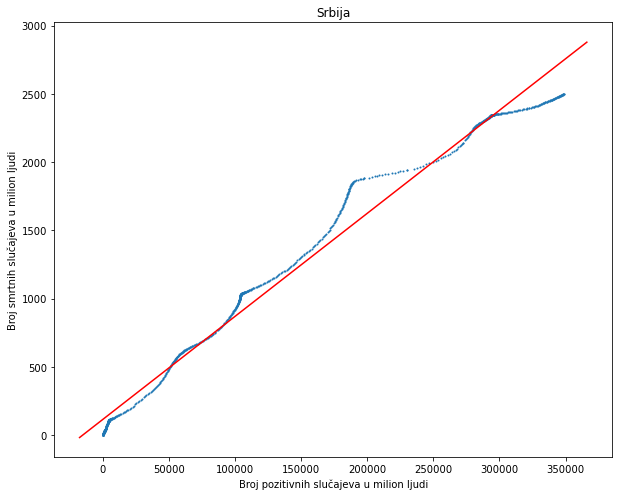

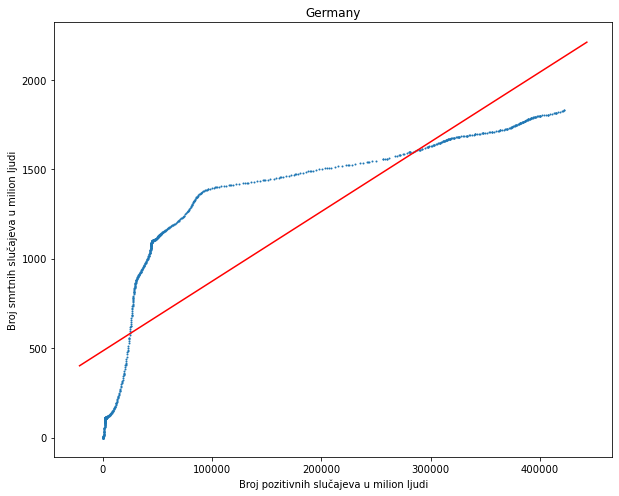

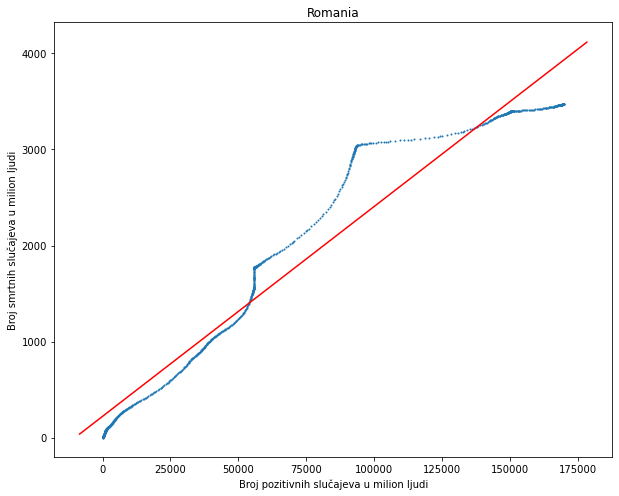

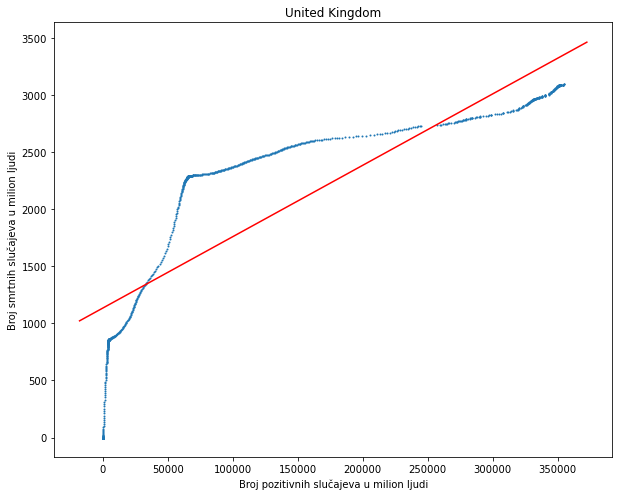

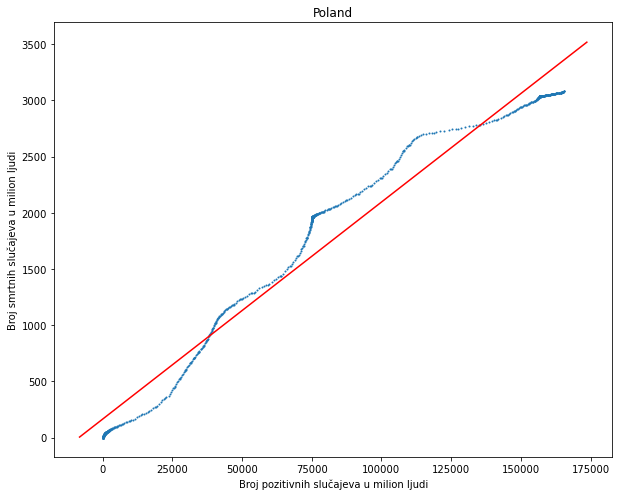

In [68]:
def f(x,w):
    return w[0]+w[1]*x
#U country_filter smestamo samo Srbiju.
country_filter = covid_data[covid_data.location == 'Serbia']
A=np.array(country_filter['total_cases_per_million'])
A = np.where(np.isnan(A), 0, A) #Fixuje error koji se javljao da neće da izračuna w1.
A=np.array([np.ones(len(A)),A])
y=np.array(country_filter['total_deaths_per_million'])
y = np.where(np.isnan(y), 0, y)
w1 = np.linalg.lstsq(A.T,y)[0] # parametri
ax=country_filter.plot(kind='scatter',s=1,x='total_cases_per_million',y='total_deaths_per_million',figsize=[10,8])
plot.xlabel('Broj pozitivnih slučajeva u milion ljudi')
plot.ylabel('Broj smrtnih slučajeva u milion ljudi')
plot.title('Srbija')
x0,x1=plot.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r')  # dovoljne su dve tacke za crtanje
plot.show()
#U country_filter smestamo samo Nemačku.
country_filter = covid_data[covid_data.location == 'Germany']
A=np.array(country_filter['total_cases_per_million'])
A = np.where(np.isnan(A), 0, A)
A=np.array([np.ones(len(A)),A])
y=np.array(country_filter['total_deaths_per_million'])
y = np.where(np.isnan(y), 0, y)
w1 = np.linalg.lstsq(A.T,y)[0] # parametri
ax=country_filter.plot(kind='scatter',s=1,x='total_cases_per_million',y='total_deaths_per_million',figsize=[10,8])
plot.xlabel('Broj pozitivnih slučajeva u milion ljudi')
plot.ylabel('Broj smrtnih slučajeva u milion ljudi')
plot.title('Germany')
x0,x1=plot.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r')  # dovoljne su dve tacke za crtanje
plot.show()
#U country_filter smestamo samo Rumuniju.
country_filter = covid_data[covid_data.location == 'Romania']
A=np.array(country_filter['total_cases_per_million'])
A = np.where(np.isnan(A), 0, A)
A=np.array([np.ones(len(A)),A])
y=np.array(country_filter['total_deaths_per_million'])
y = np.where(np.isnan(y), 0, y)
w1 = np.linalg.lstsq(A.T,y)[0] # parametri
ax=country_filter.plot(kind='scatter',s=1,x='total_cases_per_million',y='total_deaths_per_million',figsize=[10,8])
plot.xlabel('Broj pozitivnih slučajeva u milion ljudi')
plot.ylabel('Broj smrtnih slučajeva u milion ljudi')
plot.title('Romania')
x0,x1=plot.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r')  # dovoljne su dve tacke za crtanje
plot.show()
#U country_filter smestamo samo Britaniju.
country_filter = covid_data[covid_data.location == 'United Kingdom']
A=np.array(country_filter['total_cases_per_million'])
A = np.where(np.isnan(A), 0, A)
A=np.array([np.ones(len(A)),A])
y=np.array(country_filter['total_deaths_per_million'])
y = np.where(np.isnan(y), 0, y)
w1 = np.linalg.lstsq(A.T,y)[0] # parametri
ax=country_filter.plot(kind='scatter',s=1,x='total_cases_per_million',y='total_deaths_per_million',figsize=[10,8])
plot.xlabel('Broj pozitivnih slučajeva u milion ljudi')
plot.ylabel('Broj smrtnih slučajeva u milion ljudi')
plot.title('United Kingdom')
x0,x1=plot.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r')  # dovoljne su dve tacke za crtanje
plot.show()
#U country_filter smestamo samo Poljsku.
country_filter = covid_data[covid_data.location == 'Poland']
A=np.array(country_filter['total_cases_per_million'])
A = np.where(np.isnan(A), 0, A)
A=np.array([np.ones(len(A)),A])
y=np.array(country_filter['total_deaths_per_million'])
y = np.where(np.isnan(y), 0, y)
w1 = np.linalg.lstsq(A.T,y)[0] # parametri
ax=country_filter.plot(kind='scatter',s=1,x='total_cases_per_million',y='total_deaths_per_million',figsize=[10,8])
plot.xlabel('Broj pozitivnih slučajeva u milion ljudi')
plot.ylabel('Broj smrtnih slučajeva u milion ljudi')
plot.title('Poland')
x0,x1=plot.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r')  # dovoljne su dve tacke za crtanje
plot.show()

#### Zaključak linearne regresije:


Iz predhodnih grafika, možemo da primetimo da su razvijenije države Evrope (Nemačka, Ujedinjeno Kraljevstvo) u početku pandemije imale mnogo veću stopu smrtnosti nego u malo poodmaklim fazama pandemije, dok su države kao što su Srbija, Rumunija i Poljska (srednje razvijene države) kroz celu pandemiju imale gotovo sličnu stopu smrtnosti. Na sve ovo Srbija ima mnogo veću stopu vakcinacije od Nemačke (124 po 1000 Srbija, 74 po 1000 Nemačka) što nam govori da sama vakcina ne umanjuje smrtnost.

### Višestruka regresija

Stopa smrtnosti od korone u zavisnosti od obolelih od KVS bolesti i dijabetesa.

In [34]:
import statsmodels.formula.api as sm
from scipy import stats
from statsmodels.formula.api import ols

model1 = ols("total_deaths_per_million ~ cardiovasc_death_rate + diabetes_prevalence", covid_data).fit()
print(model1.summary())

                               OLS Regression Results                               
Dep. Variable:     total_deaths_per_million   R-squared:                       0.016
Model:                                  OLS   Adj. R-squared:                  0.016
Method:                       Least Squares   F-statistic:                     1392.
Date:                      Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                              16:52:48   Log-Likelihood:            -1.3843e+06
No. Observations:                    166591   AIC:                         2.769e+06
Df Residuals:                        166588   BIC:                         2.769e+06
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

In [36]:
model2 = ols("total_deaths_per_million ~ cardiovasc_death_rate * diabetes_prevalence", covid_data).fit()
print(model2.summary())

                               OLS Regression Results                               
Dep. Variable:     total_deaths_per_million   R-squared:                       0.017
Model:                                  OLS   Adj. R-squared:                  0.017
Method:                       Least Squares   F-statistic:                     938.9
Date:                      Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                              16:53:34   Log-Likelihood:            -1.3843e+06
No. Observations:                    166591   AIC:                         2.769e+06
Df Residuals:                        166587   BIC:                         2.769e+06
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

### Polinomska regresija

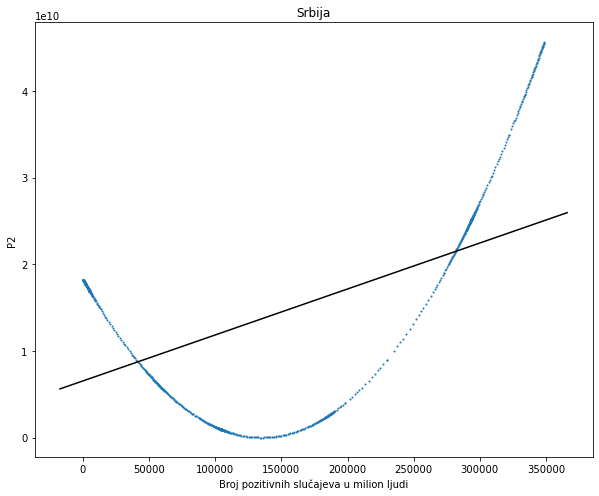

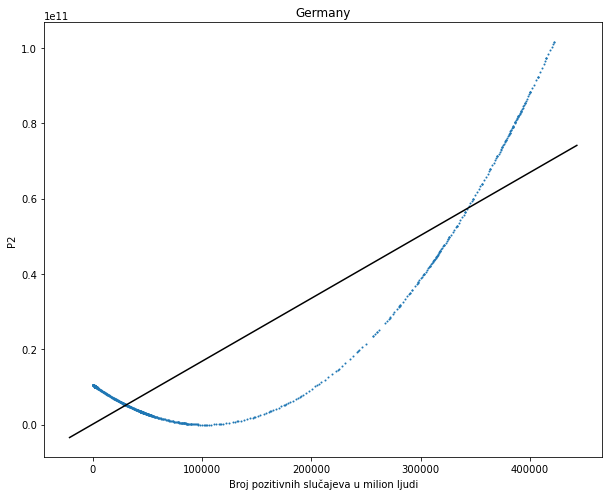

In [52]:
#U country_filter smestamo samo Srbiju.
country_filter = covid_data[covid_data.location == 'Serbia']
total_cases_per_million_average = country_filter["total_cases_per_million"].mean()
country_filter['P2']=country_filter['total_deaths_per_million']+(country_filter['total_cases_per_million']-total_cases_per_million_average)**2

A=np.array(country_filter['total_cases_per_million'])
A = np.where(np.isnan(A), 0, A)
A=np.array([np.ones(len(A)),A])
y=np.array(country_filter['P2'])
y = np.where(np.isnan(y), 0, y)

w1 = np.linalg.lstsq(A.T,y)[0] # finding the optimal parameters
def f(x,w):
    return w[0]+w[1]*x

ax=country_filter.plot(kind='scatter',s=1,x='total_cases_per_million',y='P2',figsize=[10,8])
x0,x1=plot.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'k')
plot.xlabel('Broj pozitivnih slučajeva u milion ljudi')
plot.title('Srbija')
plot.show()

#U country_filter smestamo samo Nemačku.
country_filter = covid_data[covid_data.location == 'Germany']
total_cases_per_million_average = country_filter["total_cases_per_million"].mean()
country_filter['P2']=country_filter['total_deaths_per_million']+(country_filter['total_cases_per_million']-total_cases_per_million_average)**2

A=np.array(country_filter['total_cases_per_million'])
A = np.where(np.isnan(A), 0, A)
A=np.array([np.ones(len(A)),A])
y=np.array(country_filter['P2'])
y = np.where(np.isnan(y), 0, y)

w1 = np.linalg.lstsq(A.T,y)[0] # finding the optimal parameters
def f(x,w):
    return w[0]+w[1]*x

ax=country_filter.plot(kind='scatter',s=1,x='total_cases_per_million',y='P2',figsize=[10,8])
x0,x1=plot.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'k')
plot.xlabel('Broj pozitivnih slučajeva u milion ljudi')
plot.title('Germany')
plot.show()


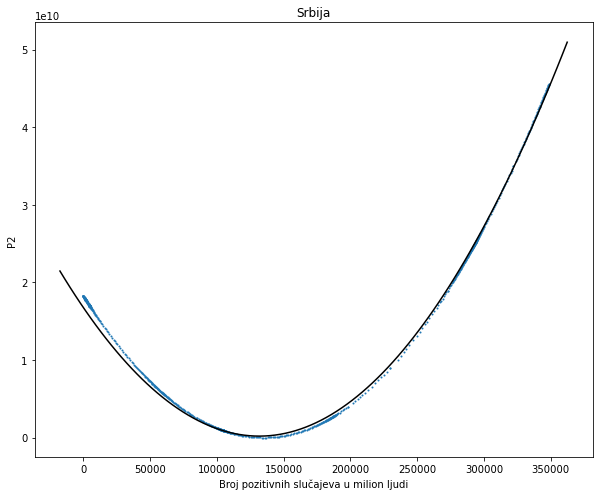

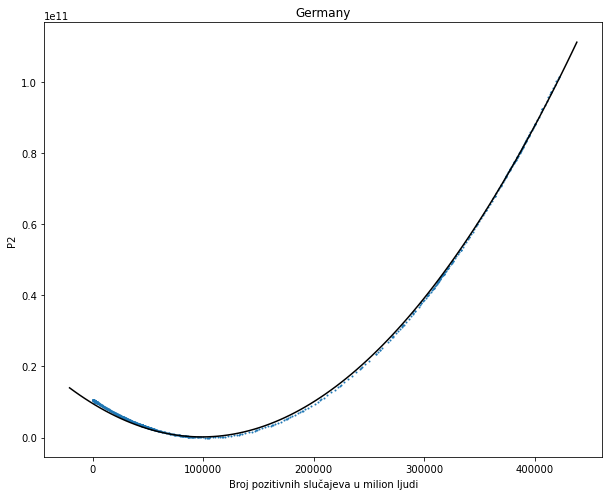

In [65]:
# Kvadratna regresija:
#U country_filter smestamo samo Srbiju.
country_filter = covid_data[covid_data.location == 'Serbia']
total_cases_per_million_average = country_filter["total_cases_per_million"].mean()
country_filter['P2']=country_filter['total_deaths_per_million']+(country_filter['total_cases_per_million']-total_cases_per_million_average)**2

A=np.array(country_filter['total_cases_per_million'])
A = np.where(np.isnan(A), 0, A)
A=np.array([np.ones(len(A)),A,A**2])
y=np.array(country_filter['P2'])
y = np.where(np.isnan(y), 0, y)

w2 = np.linalg.lstsq(A.T,y)[0]
#print(w2)
def f2(x,w):
    return w[0]+w[1]*x+w[2]*x**2

ax=country_filter.plot(kind='scatter',s=1,x='total_cases_per_million',y='P2',figsize=[10,8])
x0,x1=plot.xlim()

opseg=x1-x0
X=np.arange(x0,x1,opseg/100.)
ax.plot(X,f2(X,w2),'k')
plot.xlabel('Broj pozitivnih slučajeva u milion ljudi')
plot.title('Srbija')
plot.show()

#U country_filter smestamo samo Germany.
country_filter = covid_data[covid_data.location == 'Germany']
total_cases_per_million_average = country_filter["total_cases_per_million"].mean()
country_filter['P2']=country_filter['total_deaths_per_million']+(country_filter['total_cases_per_million']-total_cases_per_million_average)**2

A=np.array(country_filter['total_cases_per_million'])
A = np.where(np.isnan(A), 0, A)
A=np.array([np.ones(len(A)),A,A**2])
y=np.array(country_filter['P2'])
y = np.where(np.isnan(y), 0, y)

w2 = np.linalg.lstsq(A.T,y)[0]
#print(w2)
def f2(x,w):
    return w[0]+w[1]*x+w[2]*x**2

ax=country_filter.plot(kind='scatter',s=1,x='total_cases_per_million',y='P2',figsize=[10,8])
x0,x1=plot.xlim()

opseg=x1-x0
X=np.arange(x0,x1,opseg/100.)
ax.plot(X,f2(X,w2),'k')
plot.xlabel('Broj pozitivnih slučajeva u milion ljudi')
plot.title('Germany')
plot.show()

## Bezuslovna verovatnoća

<ul><li>Želimo da vidimo koji je najčešći faktor poverenja u vladu svoje države među ispitanicima (pozitivnim na korona virus) u 2020-oj godini u više različitih država.</li></ul>

In [112]:
#Prikazujemo poverenje.
poverenje = covid_cases['Governmenttrust'].value_counts()
poverenje = poverenje[ : -1]
poverenje.head(10) #Ocena je od 1 do 10

7     1552
8     1387
6      963
5      823
3      657
4      629
9      498
2      363
1      290
10     183
Name: Governmenttrust, dtype: int64

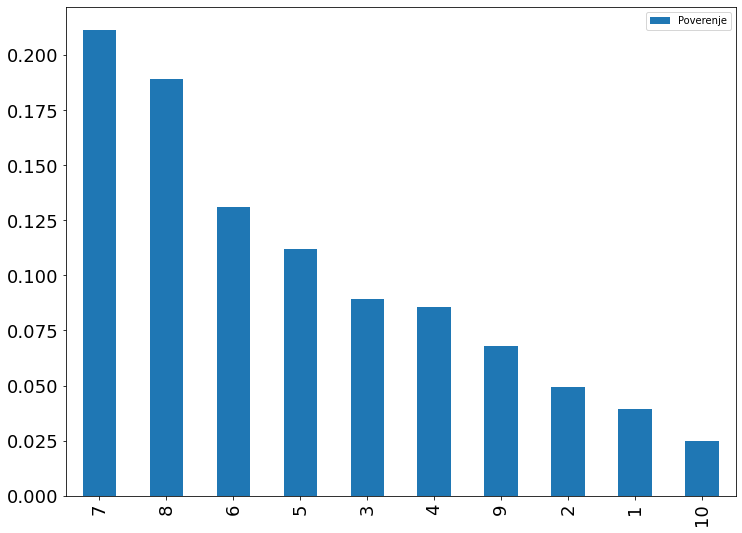

In [113]:
info = pd.DataFrame((poverenje/poverenje.sum()))
info.columns = ["Poverenje"]

info.plot.bar(figsize=(12,9), fontsize=18)
plot.xlabel('Ocena poverenja')
plot.ylabel('Verovatnoća')
plot.show()

## Uslovna verovatnoća

<ul><li>Želimo da vidimo koji je najčešći faktor poverenja u vladu svoje države među ispitanicima (pozitivnim na korona virus) u 2020-oj godini u više različitih država, različitih godina.</li></ul>

In [127]:
year_filter = covid_cases[covid_cases.Age >= 45]
poverenje = year_filter['Governmenttrust'].value_counts()
poverenje.head(10) #Ocena je od 1 do 10

5     27
7     22
8     18
9     16
3     13
4     11
6     10
1     10
2     10
10     4
Name: Governmenttrust, dtype: int64

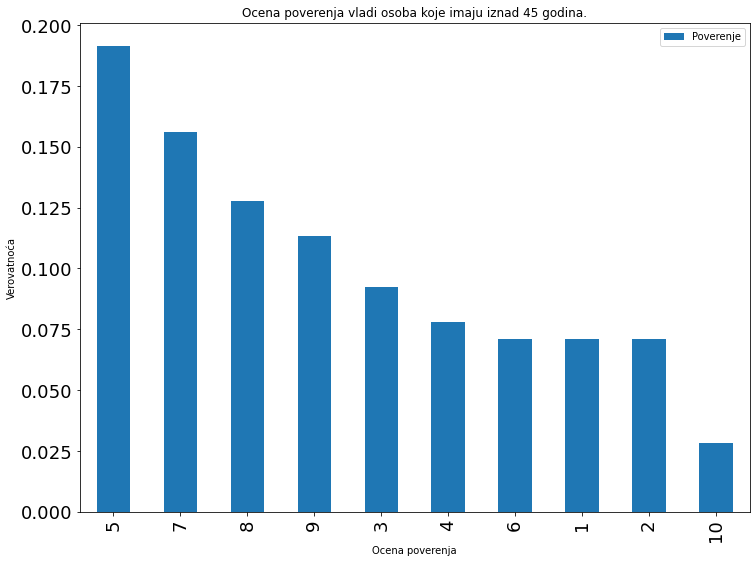

In [128]:
info = pd.DataFrame((poverenje/poverenje.sum()))
info.columns = ["Poverenje"]

info.plot.bar(figsize=(12,9), fontsize=18)
plot.title('Ocena poverenja vladi osoba koje imaju iznad 45 godina.')
plot.xlabel('Ocena poverenja')
plot.ylabel('Verovatnoća')
plot.show()

## Raspodela pojedinačnih promenljivih

### Raspodela pojedinačnih promenljivih nad godinama iz tabele za ankete obolelih ljudi.

Matematičko očekivanje godina je: 22.83911973756151
Varijansa godina je: 35.176164583879164
Standardna devijacija godina je: 5.930949720228554
Medijana godina je: 21.0
Kvantil reda 0.25 godina je: 20.0


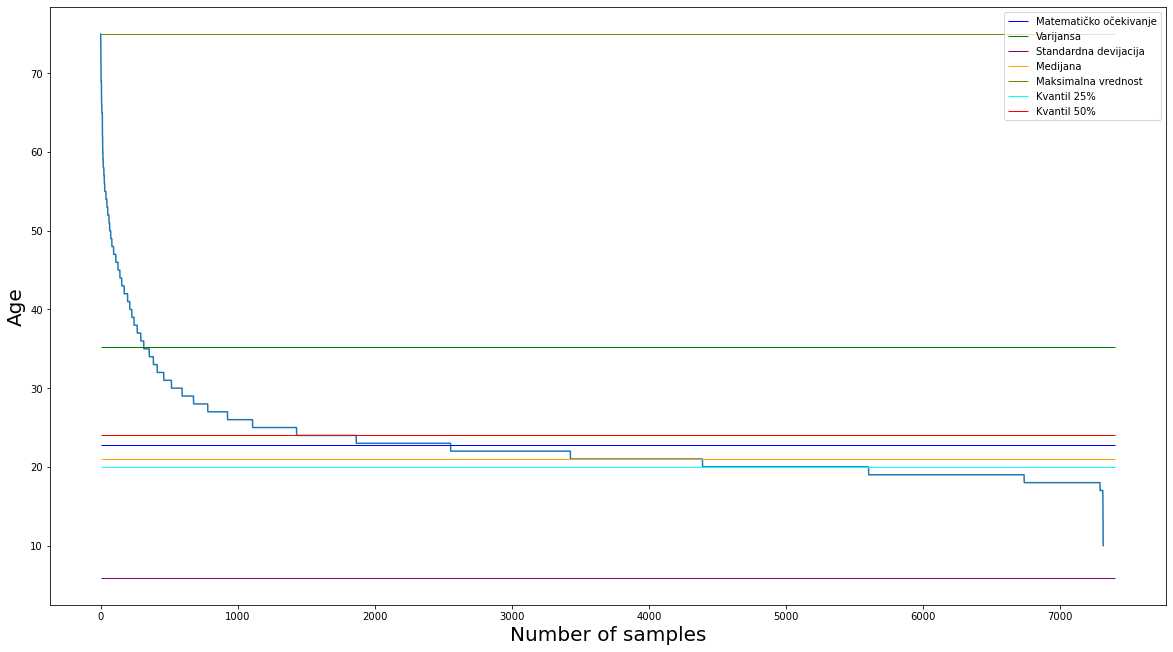

,Age
count,7316.00000
mean,22.83912
std,5.93095
min,10.00000
25%,20.00000
50%,21.00000
75%,24.00000
max,75.00000


In [264]:
print('Matematičko očekivanje godina je: {}'.format(covid_cases['Age'].mean()))
print('Varijansa godina je: {}'.format(covid_cases['Age'].var()))
print('Standardna devijacija godina je: {}'.format(covid_cases['Age'].std()))
print('Medijana godina je: {}'.format(covid_cases['Age'].median()))
print('Kvantil reda 0.25 godina je: {}'.format(covid_cases['Age'].quantile(q=0.25)))

plot.figure(figsize=(20, 11))
plot.plot(covid_cases['Age'])
plot.hlines(xmin=0, xmax=covid_cases['Age'].size,
           y=covid_cases['Age'].mean(), 
           linewidth=1.0,
           color="blue",
           label="Matematičko očekivanje")
plot.hlines(xmin=0, xmax=covid_cases['Age'].size,
           y=covid_cases['Age'].var(), 
           linewidth=1.0,
           color="green",
           label="Varijansa")
plot.hlines(xmin=0, xmax=covid_cases['Age'].size,
           y=covid_cases['Age'].std(), 
           linewidth=1.0,
           color="purple",
           label="Standardna devijacija")
plot.hlines(xmin=0, xmax=covid_cases['Age'].size,
           y=covid_cases['Age'].median(), 
           linewidth=1.0,
           color="orange",
           label="Medijana")
plot.hlines(xmin=0, xmax=covid_cases['Age'].size,
           y=covid_cases['Age'].max(), 
           linewidth=1.0,
           color="olive",
           label="Maksimalna vrednost")
plot.hlines(xmin=0, xmax=covid_cases['Age'].size,
           y=covid_cases['Age'].quantile(q=0.25), 
           linewidth=1.0,
           color="cyan",
           label="Kvantil 25%")
plot.hlines(xmin=0, xmax=covid_cases['Age'].size,
           y=covid_cases['Age'].quantile(q=0.75), 
           linewidth=1.0,
           color="red",
           label="Kvantil 50%")

plot.legend()
plot.xlabel('Number of samples', fontsize=20)
plot.ylabel('Age', fontsize=20)
plot.show()
covid_cases.describe()

### Raspodela pojedinačnih promenljivih nad IQ iz tabele za prosečan IQ u svetu.

Matematičko očekivanje svetskog IQ je: 82.03125628140704
Varijansa svetskog IQ je: 178.1596292218669
Standardna devijacija IQ je: 13.347645081506585
Medijana IQ je: 83.13
Kvantil reda 0.25 IQ je: 74.37


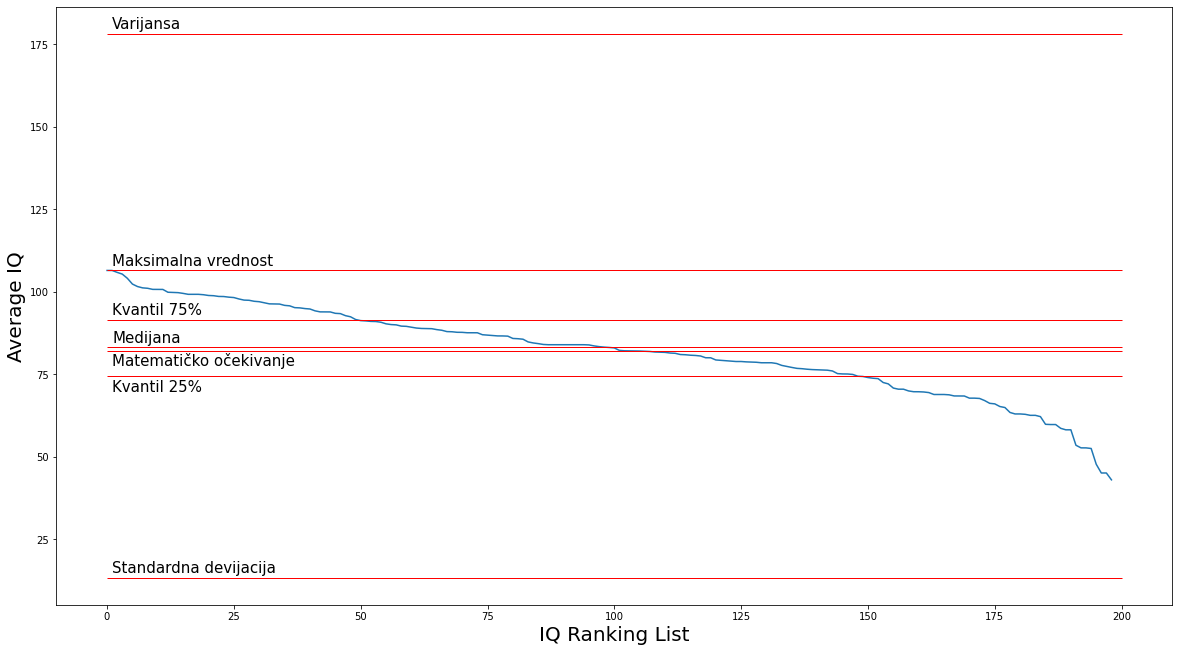

,iq
count,199.000000
mean,82.031256
std,13.347645
min,42.990000
25%,74.370000
50%,83.130000
75%,91.435000
max,106.480000


In [233]:
print('Matematičko očekivanje svetskog IQ je: {}'.format(iq_data['iq'].mean()))
print('Varijansa svetskog IQ je: {}'.format(iq_data['iq'].var()))
print('Standardna devijacija IQ je: {}'.format(iq_data['iq'].std()))
print('Medijana IQ je: {}'.format(iq_data['iq'].median()))
print('Kvantil reda 0.25 IQ je: {}'.format(iq_data['iq'].quantile(q=0.25)))

plot.figure(figsize=(20, 11))
plot.plot(iq_data['iq'])
plot.hlines(xmin=0, xmax=200,
           y=iq_data['iq'].mean(), 
           linewidth=1.0,
           color="red")
plot.text(1, iq_data['iq'].mean() - 4.5, 'Matematičko očekivanje', fontsize=15)
plot.hlines(xmin=0, xmax=200,
           y=iq_data['iq'].var(), 
           linewidth=1.0,
           color="red")
plot.text(1, iq_data['iq'].var() + 1.5, 'Varijansa', fontsize=15)
plot.hlines(xmin=0, xmax=200,
           y=iq_data['iq'].std(), 
           linewidth=1.0,
           color="red")
plot.text(1, iq_data['iq'].std() + 1.5, 'Standardna devijacija', fontsize=15)
plot.hlines(xmin=0, xmax=200,
           y=iq_data['iq'].median(), 
           linewidth=1.0,
           color="red")
plot.text(1, iq_data['iq'].median() + 1.5, 'Medijana', fontsize=15)
plot.hlines(xmin=0, xmax=200,
           y=iq_data['iq'].max(), 
           linewidth=1.0,
           color="red")
plot.text(1, iq_data['iq'].max() + 1.5, 'Maksimalna vrednost', fontsize=15)
plot.hlines(xmin=0, xmax=200,
           y=iq_data['iq'].quantile(q=0.25), 
           linewidth=1.0,
           color="red")
plot.text(1, iq_data['iq'].quantile(q=0.25) - 4.5, 'Kvantil 25%', fontsize=15)
plot.hlines(xmin=0, xmax=200,
           y=iq_data['iq'].quantile(q=0.75), 
           linewidth=1.0,
           color="red")
plot.text(1, iq_data['iq'].quantile(q=0.75) + 1.5, 'Kvantil 75%', fontsize=15)


plot.xlabel('IQ Ranking List', fontsize=20)
plot.ylabel('Average IQ', fontsize=20)
plot.show()
iq_data.describe()

## Interval poverenja

In [317]:
# Nalazimo 99% interval poverenja
alpha = 0.01
order = 1-alpha/2
sample_size=10
Quant = stats.t.ppf(order, df=sample_size-1)
sample_of_means = []
date_filtered = covid_data[covid_data.date == '2022-10-22']
median_filtered_nan = date_filtered['median_age']
median_filtered = median_filtered_nan.dropna()

CIs = []
for i in range(median_filtered.size):
    sample_of_means.append(median_filtered.sample(sample_size).mean())
    margin = Quant * (median_filtered.sample(sample_size).std()/sample_size**0.5)
    CI_MO = (median_filtered.sample(sample_size).mean() - margin, median_filtered.sample(sample_size).mean() + margin)
    CIs.append(CI_MO)
print(median_filtered.mean())
CIs

30.347643979057587


[(19.1771565155856, 39.9828434844144),
 (24.35355718200387, 36.416442817996135),
 (18.058225135110405, 40.471774864889596),
 (20.872372403793193, 36.35762759620681),
 (26.41906860048765, 42.56093139951234),
 (19.114922777142816, 42.465077222857175),
 (23.36067508572064, 36.78932491427935),
 (23.15268453052916, 35.22731546947084),
 (21.003599336268, 42.816400663732),
 (22.355264109932246, 38.90473589006775),
 (19.380685716216227, 37.099314283783784),
 (22.40554002307777, 38.644459976922235),
 (24.05251206367224, 42.71748793632776),
 (18.201244876795734, 35.57875512320427),
 (24.458500989366293, 39.8814990106337),
 (15.516788334810668, 38.313211665189336),
 (21.877902438551146, 38.98209756144885),
 (24.57614884349828, 42.73385115650172),
 (21.9931156357122, 40.72688436428779),
 (20.344882455371916, 38.11511754462808),
 (25.498017686808677, 34.11198231319132),
 (23.816280247250468, 37.76371975274953),
 (21.068554075596168, 43.63144592440383),
 (24.73083915618512, 38.02916084381488),
 (20.

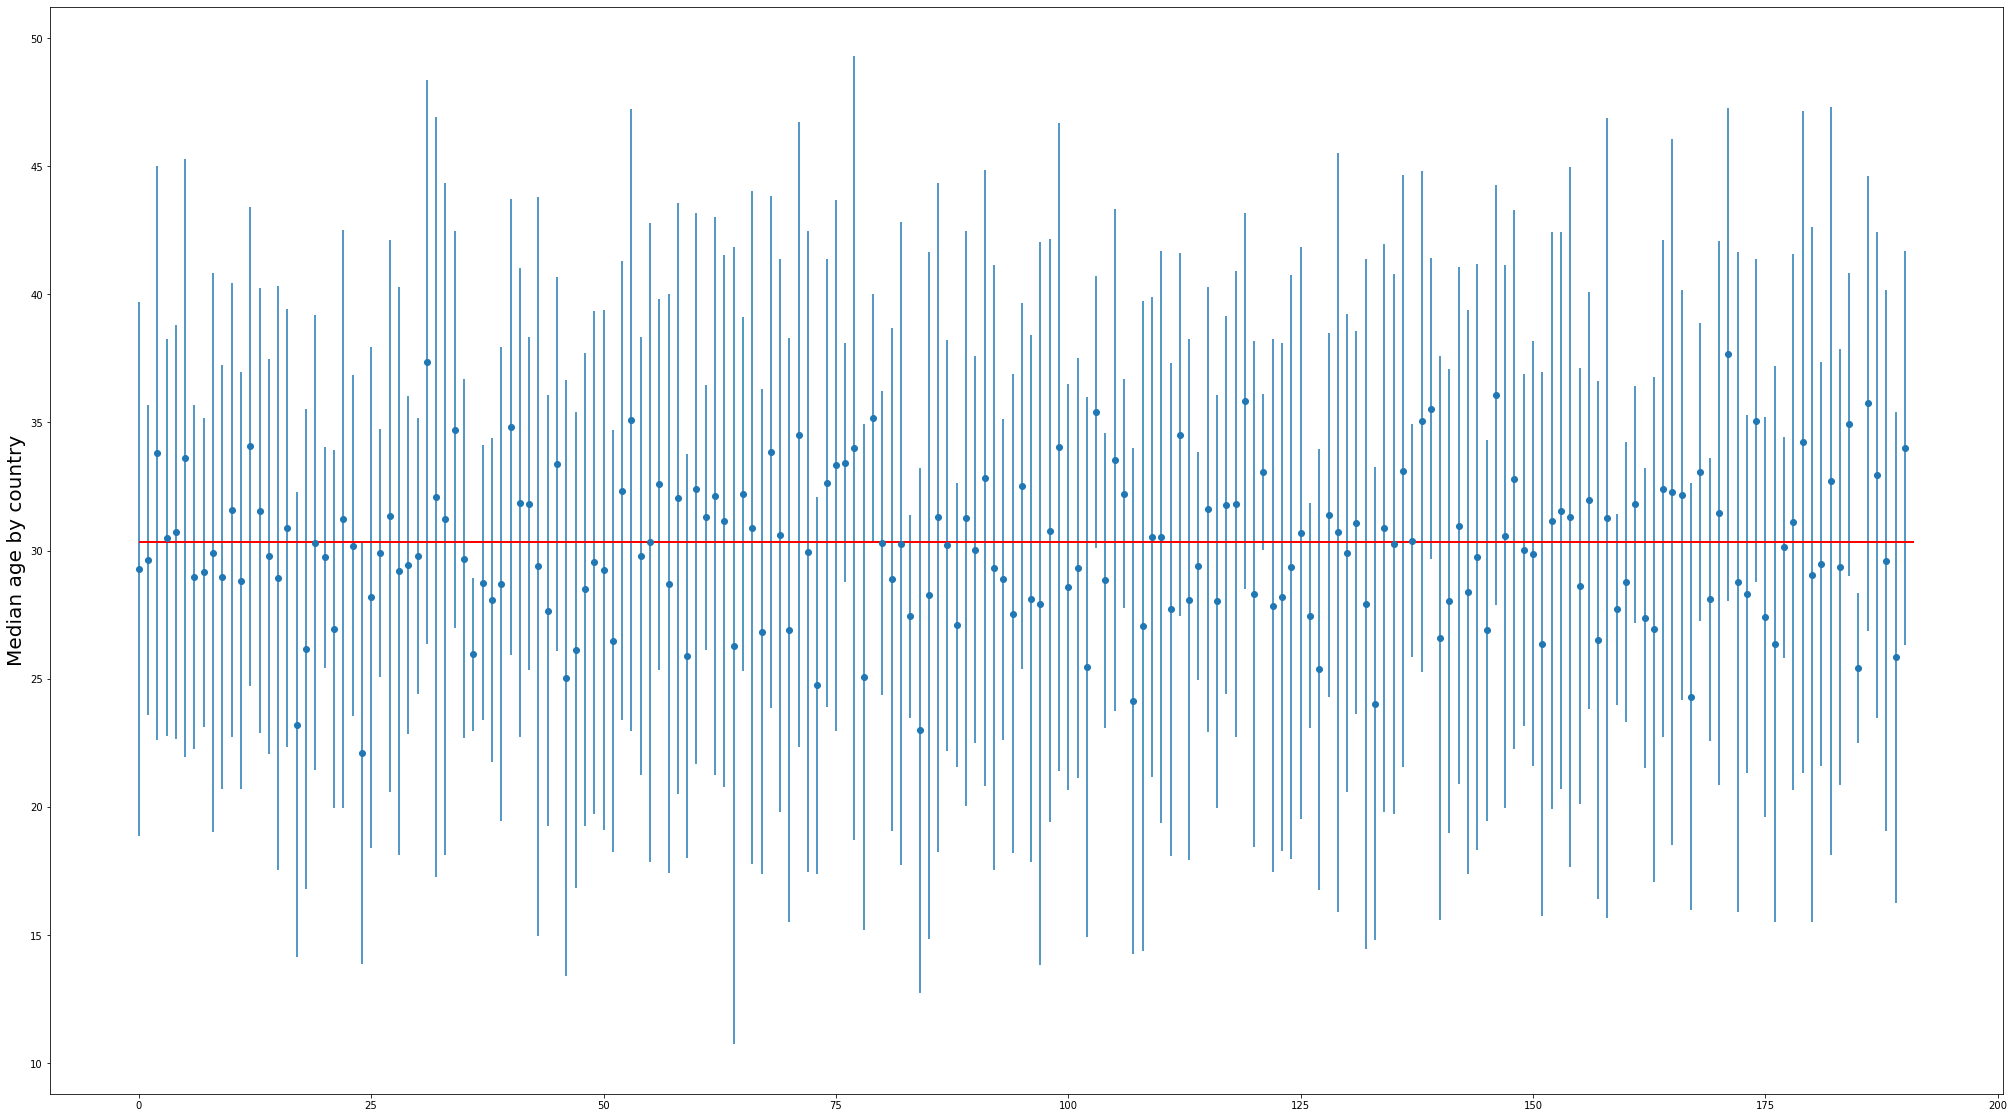

In [325]:
plot.figure(figsize=(35,20))

plot.errorbar(x=np.arange(0,median_filtered.size),y=sample_of_means[0:median_filtered.size],yerr=[(up-down)/2 for up,down in CIs],fmt='o')

plot.hlines(xmin=0, xmax=median_filtered.size,y=median_filtered.mean(),linewidth=2.0,color="red")

plot.ylabel('Median age by country', fontsize=20)
plot.show()

In [344]:
# Nalazimo 95% interval poverenja
alpha = 0.05
order = 1-alpha/2
sample_size=10
Quant = stats.t.ppf(order, df=sample_size-1)
sample_of_means = []
date_filtered = covid_data[covid_data.date == '2022-10-22']
total_deaths_per_million_nan = date_filtered['total_deaths_per_million']
total_deaths_per_million = total_deaths_per_million_nan.dropna()

CIs = []
for i in range(total_deaths_per_million.size):
    sample_of_means.append(total_deaths_per_million.sample(sample_size).mean())
    margin = Quant * (total_deaths_per_million.sample(sample_size).std()/sample_size**0.5)
    CI_MO = (total_deaths_per_million.sample(sample_size).mean() - margin, total_deaths_per_million.sample(sample_size).mean() + margin)
    CIs.append(CI_MO)
print(total_deaths_per_million.mean())
CIs

1222.1532610619477


[(900.7151348007953, 2211.7564651992043),
 (269.27047923715145, 1680.8238207628485),
 (584.9823373391272, 2382.5048626608727),
 (-49.82246074519708, 1726.1950607451968),
 (317.14133947397386, 1991.7005605260263),
 (51.437421088514384, 2775.799278911486),
 (642.814258929416, 2153.1424410705836),
 (448.3451799007114, 2474.9956200992883),
 (579.1332042331715, 1761.0864957668284),
 (479.2975284355798, 1685.9354715644201),
 (1090.1012596452595, 1119.6496403547403),
 (-344.40223214472815, 1853.3247321447282),
 (208.98888435341019, 2341.6887156465896),
 (-748.2725874578286, 1772.4747874578286),
 (360.840633036644, 1342.810166963356),
 (497.71613760010337, 1733.5036623998963),
 (817.2059119593665, 1622.9999880406335),
 (-474.4032395173498, 2865.21363951735),
 (702.3992475231532, 2078.682752476847),
 (343.24152328107584, 2223.7527767189245),
 (90.02319235072048, 2206.6867076492795),
 (-110.91601350697442, 2770.8159135069745),
 (309.2191701060374, 2730.628529893963),
 (356.7295733535283, 1037.78

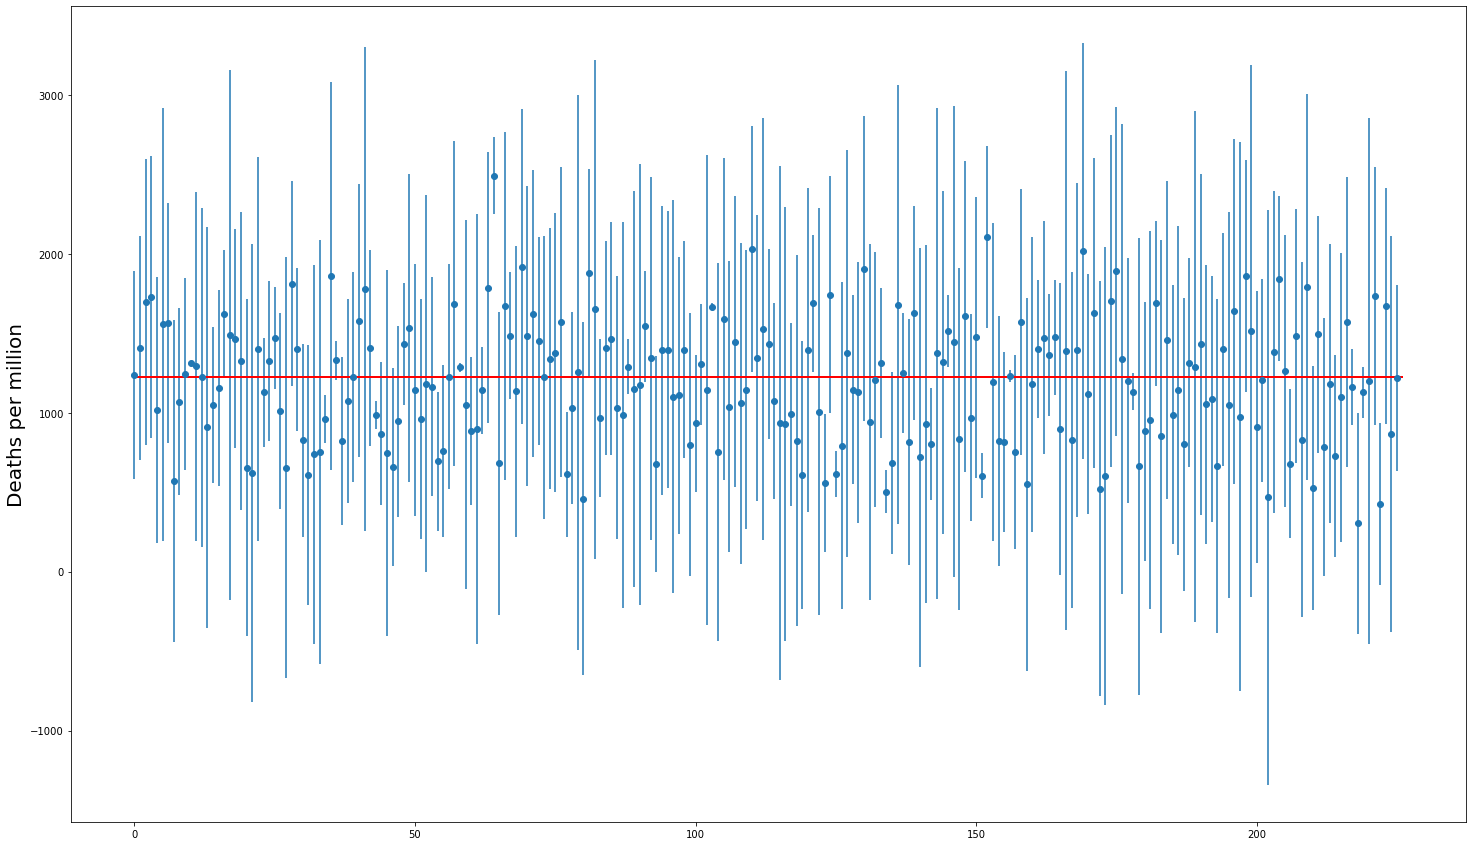

In [345]:
plot.figure(figsize=(25,15))

plot.errorbar(x=np.arange(0,total_deaths_per_million.size),y=sample_of_means[0:total_deaths_per_million.size],yerr=[(up-down)/2 for up,down in CIs],fmt='o')

plot.hlines(xmin=0, xmax=total_deaths_per_million.size,y=total_deaths_per_million.mean(),linewidth=2.0,color="red")

plot.ylabel('Deaths per million', fontsize=20)
plot.show()

## Testiranje hipoteza o raspodeli

### Hi-kvadrat test

Testiramo hipotezu da nema zavisnosti između nošenja maske i starosti ispitanika.

In [45]:
from scipy.stats import chi2_contingency

usage = covid_cases['Facemaskuse']
usage = usage.dropna()
age = covid_cases['Age']
age = age.dropna()
crossTabla = pd.crosstab(usage, age)
print(crossTabla.head())
#Imamo izdvojene samo usage sad.

chi, p, df, exp = chi2_contingency(crossTabla)
print('chi sq je: {}'.format(chi))
print('p je: {}'.format(p))
print('df je: {}'.format(df))

Age          10.0  14.0  16.0  17.0  18.0  19.0  20.0  21.0  22.0  23.0  ...  \
Facemaskuse                                                              ...   
1.0             0     0     0     4   120   347   413   289   245   192  ...   
2.0             1     0     0     3    65   140   142   104   113    98  ...   
3.0             0     0     0     3   101   146   164   130   115    91  ...   
4.0             0     1     0     3   123   223   230   217   188   144  ...   
5.0             0     0     1     7   144   275   259   222   209   162  ...   

Age          58.0  59.0  60.0  62.0  65.0  66.0  67.0  69.0  71.0  74.0  
Facemaskuse                                                              
1.0             1     0     0     0     0     0     1     0     0     0  
2.0             0     1     1     0     0     0     0     0     0     0  
3.0             2     0     0     0     1     0     0     1     0     0  
4.0             0     0     1     2     0     0     0     1     0    

Izračunato je da je p < 0.05 i to znači da se hipoteza odbija što znači da zavisnost ipak postoji.

### Test Kolmogorova i Smirnova

Testiramo hipotezu o normalnoj raspodeli poverenja u vladu u državi Danskoj.

In [80]:
from scipy import stats

filter = gov_trust_factor[gov_trust_factor.LOCATION == 'Denmark']
value = filter['Value']
print(value)

75    66.868332
76    59.250595
77    66.593389
78    62.657814
79    58.668944
80    47.182333
81    53.425279
82    39.140511
83    45.783691
84    57.988864
85    46.766071
86    57.235332
87    63.247846
88    63.299903
89    71.579759
90    65.170972
Name: Value, dtype: float64


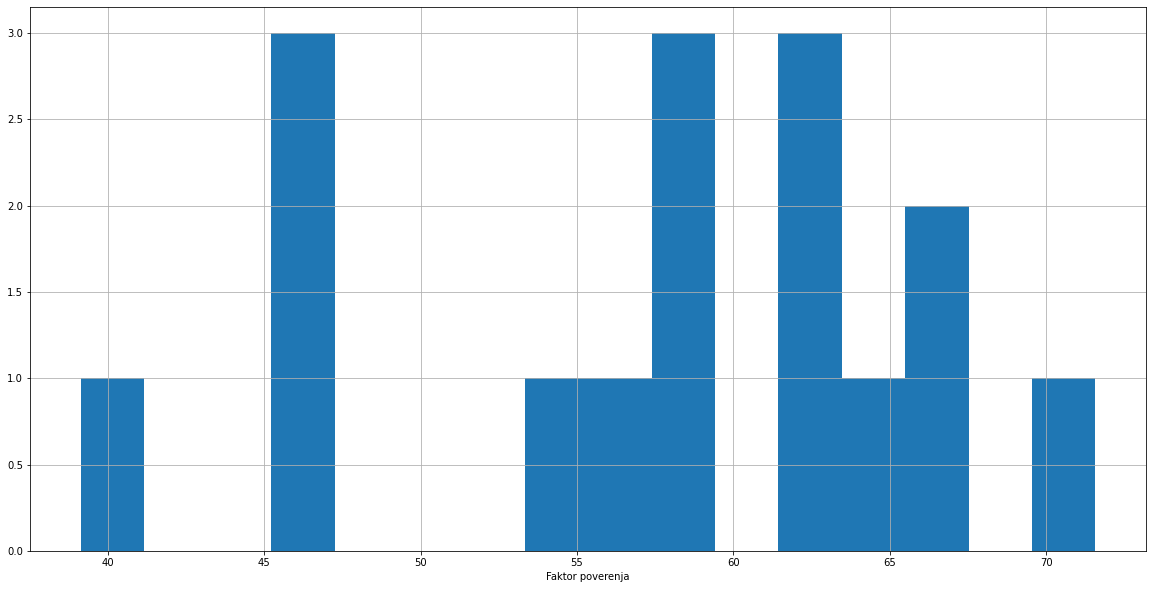

In [86]:
#Pravimo histogram.
plot.figure(figsize=(20,10))
hist = value.hist(bins=len(value))
plot.xlabel('Faktor poverenja')
plot.show()

In [89]:
# test da li je ovo normalna raspodele:

velicina_uzorka=len(value)

stats.kstest(value.sample(velicina_uzorka).dropna().values.T, cdf='norm',args=(value.dropna().values.mean(), value.dropna().values.std()))  

KstestResult(statistic=0.16172574773718695, pvalue=0.7387693475450525)

P vrednost nije mala i prilično sigurno se može reći da ovo jeste normalna raspodela.

## Dodatne zanimljivosti

Ovde ću sa već primenjenim statističkim metodama gore da odradim još neke analize koje bi mogle biti zanimljive.

### Nošenje maski za lice

Tražimo zavisnost između poverenja ljudi u vlade i nošenja maske. Moji očekivani rezultati su da što više ljudi veruju vladama svojih država to su više koristili maske za lice (jer su se iste propagirale najviše preko medija i vlade). 

In [132]:
def f(x,w):
    return w[0]+w[1]*x
filter_cases = covid_cases[covid_cases.Facemaskuse > 0]
filter_cases = filter_cases[filter_cases.Governmenttrust > 0]
usage = filter_cases['Facemaskuse']
usage = usage.dropna()
trust = filter_cases['Governmenttrust']
trust = trust.dropna()
crossTabla = pd.crosstab(usage, trust)
first = crossTabla.iloc[:, 0] #Dobijamo za 1 trust
five = crossTabla.iloc[:, 4] #Dobijamo za 1 trust
last = crossTabla.iloc[:, 9] #Dobijamo za 10 trust
print('Za najmanji goverment trust: {}'.format(first))
print('Za srednji goverment trust: {}'.format(five))
print('Za najveci goverment trust: {}'.format(last))

Za najmanji goverment trust: Facemaskuse
1.0     63
2.0     22
3.0     30
4.0     57
5.0    117
Name: 1.0, dtype: int64
Za najmanji goverment trust: Facemaskuse
1.0    173
2.0     95
3.0    130
4.0    181
5.0    243
Name: 5.0, dtype: int64
Za najveci goverment trust: Facemaskuse
1.0    74
2.0    13
3.0    20
4.0    21
5.0    55
Name: 10.0, dtype: int64


Iz gore navedenih informacija, dobijamo podatke da su podaci 'Facemaskuse' i 'Govermenttrust' usko vezani ali ne na način na koji smo očekivali. Treba uzeti u obzir da su podaci prikupljani u državama van Balkana (najviši deo je Francuska).

### Poverenje u svoje vlade tokom korona virusa

U narednom kodu, tražimo da li je od početka pandemije ljudima opalo poverenje u vlade svojih država, uzorak od 2006 do 2021 godine.

In [198]:
names = []
avg_2006_to_2019 = [] #U ovu promenjivu smeštamo srednje vrednosti poverenja od 2006 do 2019 kada je počela korona
avg_2020_2021 = [] #U ovu promenjivu smeštamo srednje vrednosti poverenja od 2006 do 2019 kada je počela korona
average = 0.0
average2 = 0.0

for index, row in gov_trust_factor.iterrows():
    if row['TIME'] == 2021:
        average2 += row['Value']
        average2 = (average2/2)
        avg_2020_2021.append(average2)
        average2 = 0.0
        continue
    if row['TIME'] == 2020:
        average2 += row['Value']
        average = (average/13)
        avg_2006_to_2019.append(average)
        average = 0.0
        continue
    if row['LOCATION'] in names:
        average += row['Value']
    else:
        #To znači da je prvi put došla ova država
        average += row['Value']
        names.append(row['LOCATION'])
broj_smanjenih = 0
for idx, x in enumerate(avg_2006_to_2019):
    if(x >= avg_2020_2021[idx]):
        broj_smanjenih += 1
#Po meni jako čudno da je samo 12 u ovom testu ali pogledaćemo sledeći test.
print('Prosek verovanja vladama od 2006 do 2019 u odnosu na 2020 i 2021 smanjio se u: {} država.'.format(broj_smanjenih))
#U ovom testu radimo između 2019 i 2020.
poverenje2019 = []
poverenje2020 = []
for index, row in gov_trust_factor.iterrows():
    #Ignorišemo češku jer u excel tabeli nisu dati podaci o njihovom poverenju u 2019 pa se size arrayova razlikuje.
    if row['LOCATION'] != 'Czechia':
        if row['TIME'] == 2019:
            poverenje2019.append(row['Value'])
        if row['TIME'] == 2020:
            poverenje2020.append(row['Value'])
broj_smanjenih = 0
for idx, x in enumerate(poverenje2019):
    if(x >= poverenje2020[idx]):
        broj_smanjenih += 1
print('Prosek verovanja vladama u 2020 u odnosu na 2019 smanjio se u: {} država.'.format(broj_smanjenih))

Prosek verovanja vladama od 2006 do 2019 u odnosu na 2020 i 2021 smanjio se u: 12 država.
Prosek verovanja vladama u 2020 u odnosu na 2019 smanjio se u: 8 država.


#### Vidimo da su ljudi za vreme pandemije, krenuli više da veruju vladama svojih država iz navedenog gore.
(ne delim isto mišljenje kao većina)

### Medijana starosti i njen uticaj na broj mrtvih za vreme pandemije

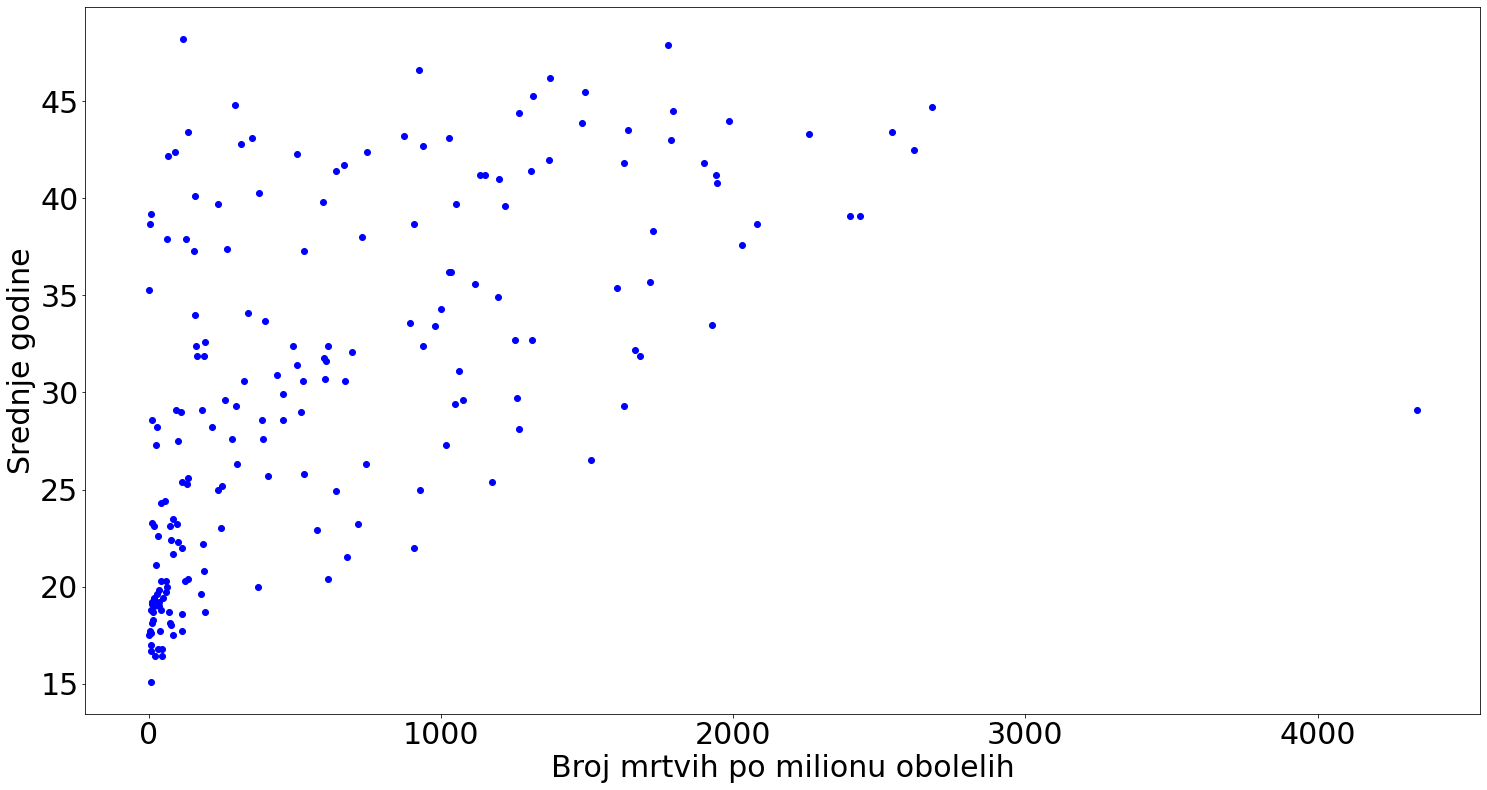

In [232]:
import math

countries = covid_data['location']
countries = countries.unique()
array = []

for idx, x in enumerate(countries):
    country_filter = covid_data[covid_data.location == x]
    deaths = country_filter['total_deaths_per_million']
    deaths = deaths.dropna()
    median = country_filter['median_age']
    if not(math.isnan(deaths.mean())): #Mislim da je ovo najmerodavnija informacija koja može da se dobije jer uzimati max i nije najpametnije.
        if not(math.isnan(median.mean())):
            array.append([deaths.mean(), median.mean()])
            
#array trenutno sadrzi sve vrednosti o broju mrtvih i median age u toj zemlji.
plot.figure(figsize=(25,13))
columns = list(zip(*array))
plot.rcParams["font.size"] = "30"
plot.xlabel('Broj mrtvih po milionu obolelih')
plot.ylabel('Srednje godine')
plot.plot(columns[0], columns[1], 'bo')

#### Može se reći da se srazmerno povećavaju za većinu testiranih slučajeva uz par izuzetaka što dovodi do zaključka da postoji uska povezanost između srednjih godina i broju mrtvih od korona virusa.

### Medijana starosti i njen uticaj na broj pacijenata u intenzivnoj nezi

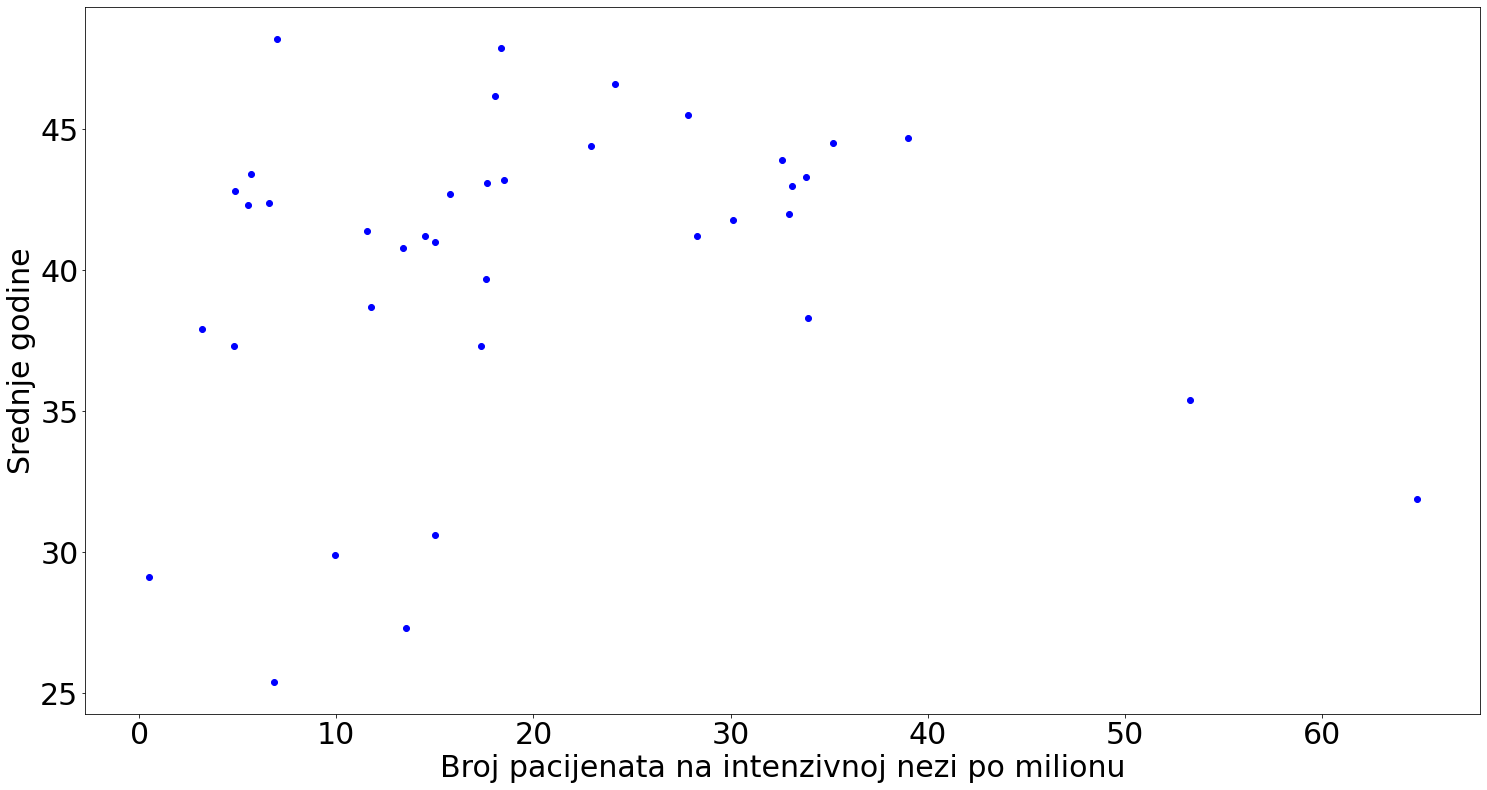

In [250]:
import math

countries = covid_data['location']
countries = countries.unique()
array = []

for idx, x in enumerate(countries):
    country_filter = covid_data[covid_data.location == x]
    icu = country_filter['icu_patients_per_million']
    icu = icu.dropna()
    median = country_filter['median_age']
    if not(math.isnan(icu.mean())): #Mislim da je ovo najmerodavnija informacija koja može da se dobije jer uzimati max i nije najpametnije.
        if not(math.isnan(median.mean())):
            array.append([icu.mean(), median.mean()])
            
plot.figure(figsize=(25,13))
columns = list(zip(*array))
plot.rcParams["font.size"] = "30"
plot.xlabel('Broj pacijenata na intenzivnoj nezi po milionu')
plot.ylabel('Srednje godine')
plot.plot(columns[0], columns[1], 'bo')

#### Može se reći da se srazmerno povećavaju za većinu testiranih slučajeva uz par izuzetaka što dovodi do zaključka da postoji uska povezanost između srednjih godina i broju pacijenata na intenzivnoj nezi.

### Broj vakcinisanih i njegov uticaj na broj pacijenata u intenzivnoj nezi

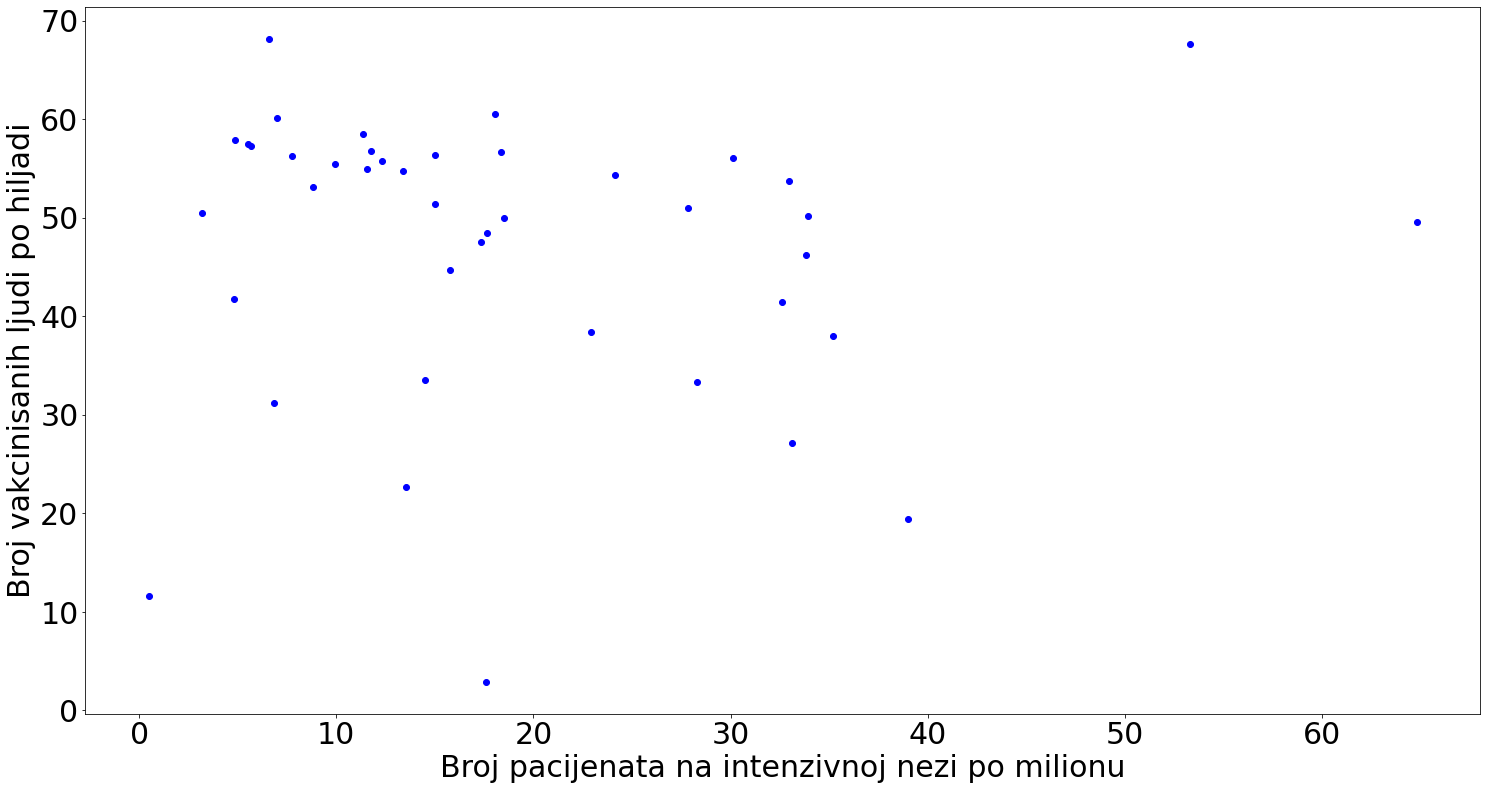

In [252]:
import math

countries = covid_data['location']
countries = countries.unique()
array = []

for idx, x in enumerate(countries):
    country_filter = covid_data[covid_data.location == x]
    icu = country_filter['icu_patients_per_million']
    icu = icu.dropna()
    vaccine = country_filter['people_fully_vaccinated_per_hundred']
    if not(math.isnan(icu.mean())): #Mislim da je ovo najmerodavnija informacija koja može da se dobije jer uzimati max i nije najpametnije.
        if not(math.isnan(vaccine.mean())):
            array.append([icu.mean(), vaccine.mean()])
            
plot.figure(figsize=(25,13))
columns = list(zip(*array))
plot.rcParams["font.size"] = "30"
plot.xlabel('Broj pacijenata na intenzivnoj nezi po milionu')
plot.ylabel('Broj vakcinisanih ljudi po hiljadi')
plot.plot(columns[0], columns[1], 'bo')

#### Iz sledećeg grafika vidimo da je broj pacijenata na ICU niži onde gde je broj vakcinisanih viši (u najvećem broju slučajeva).

### Striktnost mera i njihov uticaj na korona virus

Za vreme pandemije brojne države sveta su pooštravale svoje mere striktnosti od manjih ograničenja pa sve do potpunog zatvaranja (lockdown). U narednom primeru ćemo videti da li je to imalo efekta.

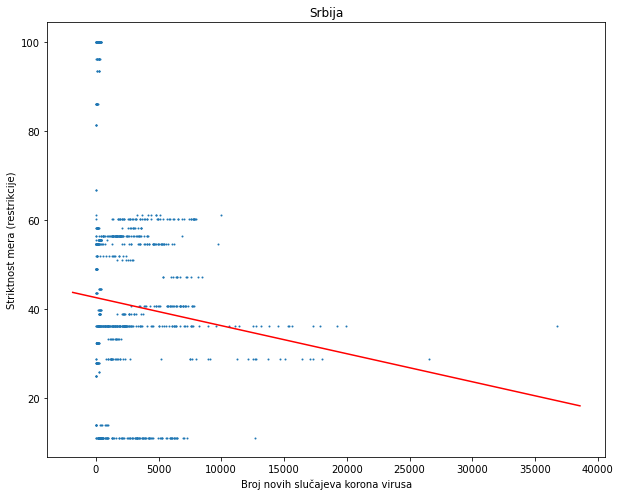

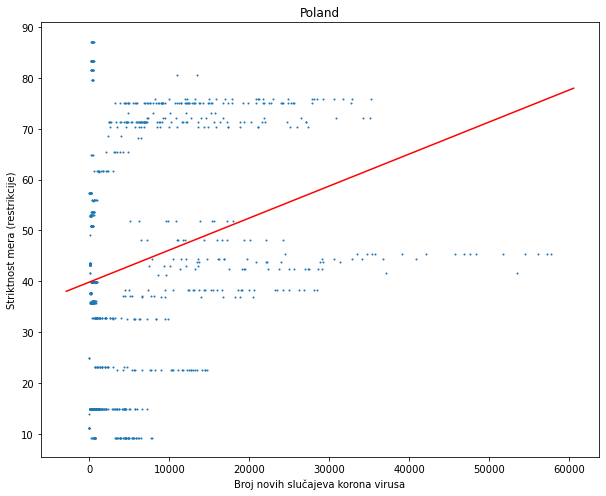

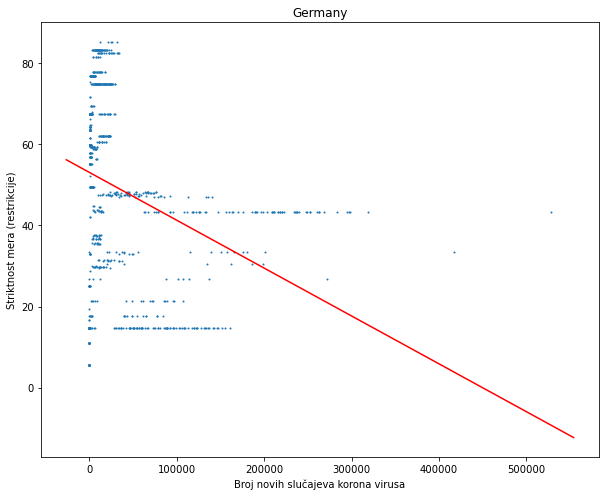

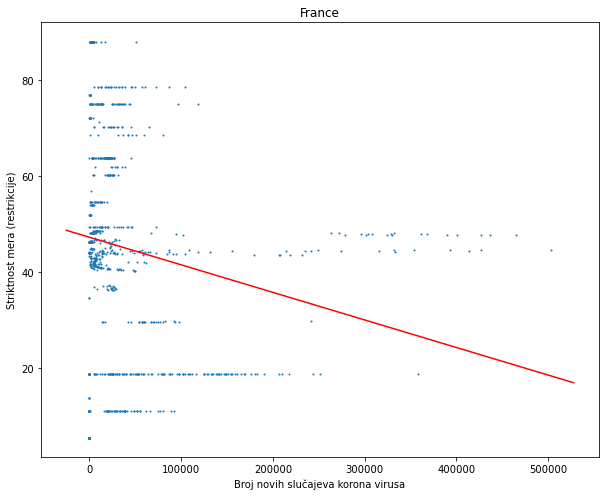

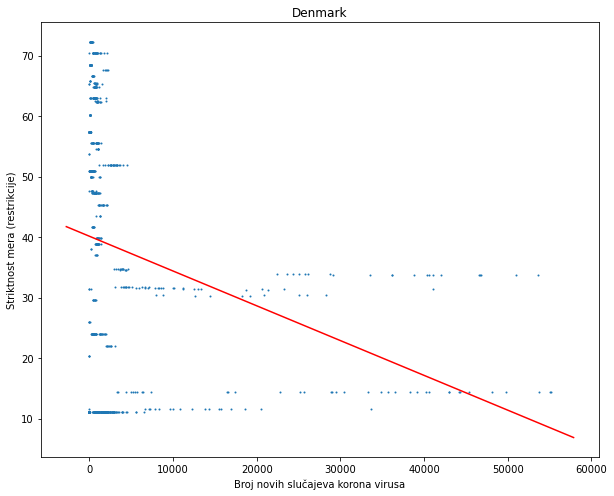

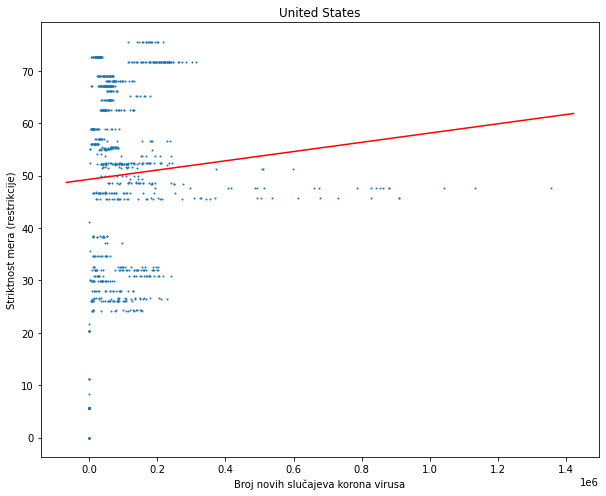

In [262]:
def f(x,w):
    return w[0]+w[1]*x
plot.rcParams["font.size"] = "10"
country_filter = covid_data[covid_data.location == 'Serbia']
A=np.array(country_filter['new_cases'])
A = np.where(np.isnan(A), 0, A) #Fixuje error koji se javljao da neće da izračuna w1.
A=np.array([np.ones(len(A)),A])
y=np.array(country_filter['striktnost_mera'])
y = np.where(np.isnan(y), 0, y)
w1 = np.linalg.lstsq(A.T,y)[0] # parametri
ax=country_filter.plot(kind='scatter',s=1,x='new_cases',y='striktnost_mera',figsize=[10,8])
plot.xlabel('Broj novih slučajeva korona virusa')
plot.ylabel('Striktnost mera (restrikcije)')
plot.title('Srbija')
x0,x1=plot.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r')  # dovoljne su dve tacke za crtanje
plot.show()

country_filter = covid_data[covid_data.location == 'Poland']
A=np.array(country_filter['new_cases'])
A = np.where(np.isnan(A), 0, A) #Fixuje error koji se javljao da neće da izračuna w1.
A=np.array([np.ones(len(A)),A])
y=np.array(country_filter['striktnost_mera'])
y = np.where(np.isnan(y), 0, y)
w1 = np.linalg.lstsq(A.T,y)[0] # parametri
ax=country_filter.plot(kind='scatter',s=1,x='new_cases',y='striktnost_mera',figsize=[10,8])
plot.xlabel('Broj novih slučajeva korona virusa')
plot.ylabel('Striktnost mera (restrikcije)')
plot.title('Poland')
x0,x1=plot.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r')  # dovoljne su dve tacke za crtanje
plot.show()

country_filter = covid_data[covid_data.location == 'Germany']
A=np.array(country_filter['new_cases'])
A = np.where(np.isnan(A), 0, A) #Fixuje error koji se javljao da neće da izračuna w1.
A=np.array([np.ones(len(A)),A])
y=np.array(country_filter['striktnost_mera'])
y = np.where(np.isnan(y), 0, y)
w1 = np.linalg.lstsq(A.T,y)[0] # parametri
ax=country_filter.plot(kind='scatter',s=1,x='new_cases',y='striktnost_mera',figsize=[10,8])
plot.xlabel('Broj novih slučajeva korona virusa')
plot.ylabel('Striktnost mera (restrikcije)')
plot.title('Germany')
x0,x1=plot.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r')  # dovoljne su dve tacke za crtanje
plot.show()

country_filter = covid_data[covid_data.location == 'France']
A=np.array(country_filter['new_cases'])
A = np.where(np.isnan(A), 0, A) #Fixuje error koji se javljao da neće da izračuna w1.
A=np.array([np.ones(len(A)),A])
y=np.array(country_filter['striktnost_mera'])
y = np.where(np.isnan(y), 0, y)
w1 = np.linalg.lstsq(A.T,y)[0] # parametri
ax=country_filter.plot(kind='scatter',s=1,x='new_cases',y='striktnost_mera',figsize=[10,8])
plot.xlabel('Broj novih slučajeva korona virusa')
plot.ylabel('Striktnost mera (restrikcije)')
plot.title('France')
x0,x1=plot.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r')  # dovoljne su dve tacke za crtanje
plot.show()

country_filter = covid_data[covid_data.location == 'Denmark']
A=np.array(country_filter['new_cases'])
A = np.where(np.isnan(A), 0, A) #Fixuje error koji se javljao da neće da izračuna w1.
A=np.array([np.ones(len(A)),A])
y=np.array(country_filter['striktnost_mera'])
y = np.where(np.isnan(y), 0, y)
w1 = np.linalg.lstsq(A.T,y)[0] # parametri
ax=country_filter.plot(kind='scatter',s=1,x='new_cases',y='striktnost_mera',figsize=[10,8])
plot.xlabel('Broj novih slučajeva korona virusa')
plot.ylabel('Striktnost mera (restrikcije)')
plot.title('Denmark')
x0,x1=plot.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r')  # dovoljne su dve tacke za crtanje
plot.show()

country_filter = covid_data[covid_data.location == 'United States']
A=np.array(country_filter['new_cases'])
A = np.where(np.isnan(A), 0, A) #Fixuje error koji se javljao da neće da izračuna w1.
A=np.array([np.ones(len(A)),A])
y=np.array(country_filter['striktnost_mera'])
y = np.where(np.isnan(y), 0, y)
w1 = np.linalg.lstsq(A.T,y)[0] # parametri
ax=country_filter.plot(kind='scatter',s=1,x='new_cases',y='striktnost_mera',figsize=[10,8])
plot.xlabel('Broj novih slučajeva korona virusa')
plot.ylabel('Striktnost mera (restrikcije)')
plot.title('United States')
x0,x1=plot.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r')  # dovoljne su dve tacke za crtanje
plot.show()

#### Iz predhodnih grafika vidimo da striktnost mera ima velikog uticaja na broj novoobolelih u većini grafika (United States je malo čudniji od ostalih iz meni nepozntih razloga).

### Odnos između prosečnog broja vakcinisanih u državi i prosečnog koeficijenta inteligencije

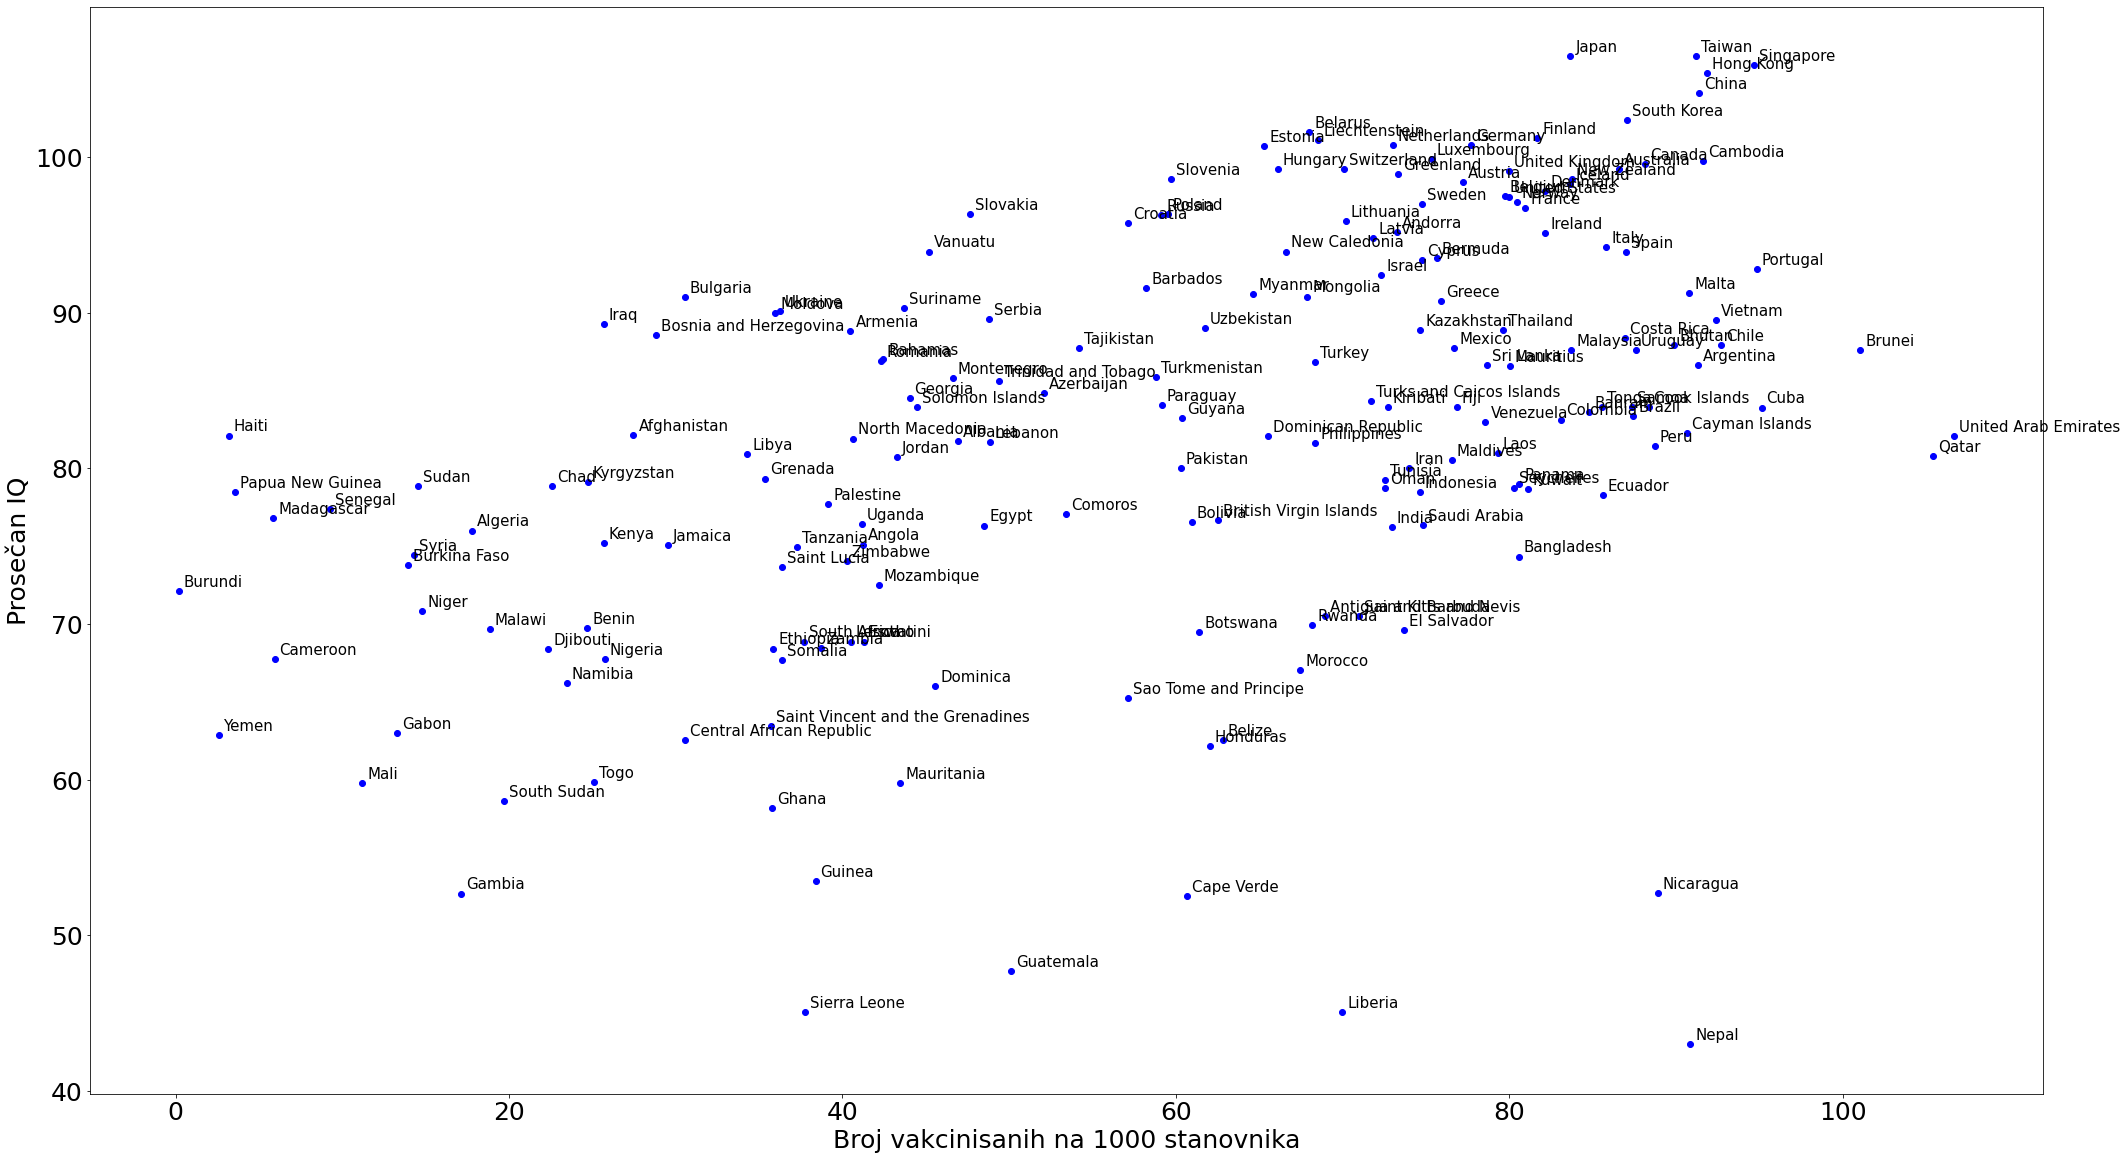

In [312]:
import math

countries = covid_data['location']
countries = countries.unique()
array = []
plot.rcParams["font.size"] = "25"

for idx, x in enumerate(countries):
    country_filter = covid_data[covid_data.location == x]
    vaccine = country_filter['people_vaccinated_per_hundred']
    vaccine = vaccine.dropna()
    if not(math.isnan(vaccine.max())):
        array.append([countries[idx], vaccine.max()])
array2 = []
for idx in range(len(array)):
    filtered = iq_data[iq_data.country == array[idx][0]]
    if filtered.empty:
        continue
    else:
        drzava = array[idx][0]
        ratio_vaccine = array[idx][1]
        iq_ljudi = filtered['iq'].item()
        array2.append([drzava, ratio_vaccine, iq_ljudi])
        continue
plot.figure(figsize=(35,20))
plot.xlabel('Broj vakcinisanih na 1000 stanovnika')
plot.ylabel('Prosečan IQ')
for idx in range(len(array2)):
    plot.plot(array2[idx][1], array2[idx][2], 'bo')
    plot.text(array2[idx][1]+0.3, array2[idx][2]+0.3, array2[idx][0], fontsize=15)

Iz grafika iznad možemo da vidimo da države sa nižim koeficijentom inteligencije manje praktikuju vakcinaciju (kada pogledamo koje su to države uglavnom su veoma nerazvijene tako da ne znači da je striktno povezano sa IQ). Na osnovu ovih podataka teško je reći da je vakcinacija direktno uslovna od samog IQ već postoje i drugi faktori.